# Deep-neural-network

In [60]:
#import sys
#sys.path.append('/home/abin/abin/projects/abin-deep-learning/')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import heapq
#from nntl import pca, nntl
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from time import time

%matplotlib inline

In [61]:
#Load data
ti = time()
data = np.loadtxt('feature_100bin.csv',delimiter=',')
print time()-ti

12.6165058613


In [62]:
#check data size
print data.shape

(1230, 10001)


In [63]:
# arrange data X and label y
X = data[:,:-1]
y = data[:,-1] - 1
y = y.astype(int)

print np.unique(y)

[0 1 2 3 4 5 6 7 8]


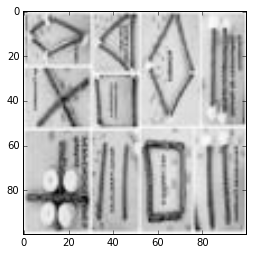

1


In [64]:
#Show a number
fig_n = 200
plt.imshow(X[fig_n,:].reshape(100,100), cmap="Greys_r")
plt.show()
print y[fig_n]

1.Preprocessing

In [65]:
#Check data distribution
y_dict = {}

for i in y:
    if y_dict.get(i) is None:
        y_dict[i] = 1
    else:
        y_dict[i] += 1

for key, value in y_dict.items():
    y_dict[key] = value / float(len(y))
    print '%d : %.3f' %(key, y_dict[key])


0 : 0.073
1 : 0.107
2 : 0.207
3 : 0.046
4 : 0.033
5 : 0.067
6 : 0.238
7 : 0.191
8 : 0.039


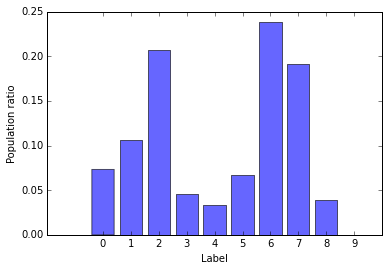

In [66]:
#Plot data distribution

bins = np.linspace(-0.5,9.5,num = 11)
plt.hist(y,bins,alpha=.6,normed = 1,rwidth = .8,label = 'Original ratings')
#plt.legend(loc='upper left')
plt.xlabel('Label')
plt.ylabel('Population ratio')
plt.xticks(np.linspace(0.0,9,num = 10))
plt.show()

In [67]:
#Normalization
X /= X.max()

#Zero mean
avg = np.mean(X,axis = 0)
X -=  avg


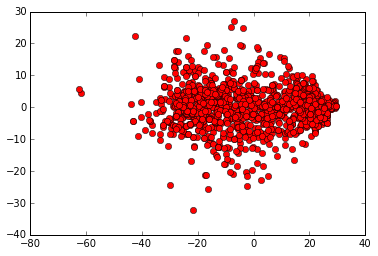

-3855.85691922


In [68]:
#pca two componets plot

pca2 = decomposition.PCA(n_components = 2)
Xpca2 = pca2.fit_transform(X)
plt.plot(Xpca2[:,0],Xpca2[:,1],'ro')
plt.show()

print pca2.score(X)

In [69]:
#plot pca scores vs features

comp = np.linspace(500,0,21)
scores=[]
for comp_num in comp:
    print int(comp_num)
    pca = decomposition.PCA(n_components = int(comp_num))
    pca.fit(X)
    scores.append(pca.score(X))

plt.plot(comp,scores)
plt.xlabel('Number of features')
plt.ylabel('Eigenvalue percentage of PCA')
plt.show()


KeyboardInterrupt: 

In [51]:
#pca reduction to 200 features
pca200 = decomposition.PCA(n_components = 200)
X = pca200.fit_transform(X)

In [32]:
#Partition into original train and test to compare with teammates. 
loc = range(len(y))
np.random.shuffle(loc)
X = X[loc,:]
y =  y[loc]

parti = 600
X_train, X_test = X[:parti], X[parti:]
y_train, y_test = y[:parti], y[parti:]


In [33]:
# initial condition for nntl
iter_times = 10000
layer_size = [20,10]
reg_coeff = 0.001

In [34]:
# accu1: use train as train, test as tet
from dnn import dnn
nntl1 = dnn(X_train, y_train, h_size = layer_size, reg = reg_coeff, niter = iter_times)
import time as ti
st = ti.time()
nntl1.model()
print ti.time()-st

y_tepd = nntl1.predict(X_test[:,:])
acc1 = nntl1.accuracy(y_test[0:],y_tepd)
print acc1

iteration: 0, loss: 2.197864
time used:  0.0164918899536
iteration: 100, loss: 2.006752
time used:  0.336344957352
iteration: 200, loss: 1.903848
time used:  0.52810883522
iteration: 300, loss: 1.878688
time used:  0.71680188179
iteration: 400, loss: 1.858307
time used:  0.905386924744
iteration: 500, loss: 1.837542
time used:  1.09295582771
iteration: 600, loss: 1.786316
time used:  1.2803440094
iteration: 700, loss: 1.687688
time used:  1.46847581863
iteration: 800, loss: 1.520336
time used:  1.65741682053
iteration: 900, loss: 1.349044
time used:  1.84862589836
iteration: 1000, loss: 2.542410
time used:  2.11638498306
iteration: 1100, loss: 1.103664
time used:  2.30960202217
iteration: 1200, loss: 0.904923
time used:  2.50457000732
iteration: 1300, loss: 1.202903
time used:  2.70777082443
iteration: 1400, loss: 0.768695
time used:  2.92048501968
iteration: 1500, loss: 0.662595
time used:  3.19384598732
iteration: 1600, loss: 0.548765
time used:  3.39091992378
iteration: 1700, loss: 

In [35]:
print confusion_matrix(y_test,y_tepd)

[[ 4  6  7  4  2  0 10 13  0]
 [ 4 16 14  1  2  1 16  4  1]
 [10 15 28  5  8  3 33 18  4]
 [ 6  7  1  6  0  1  5  6  0]
 [ 0  3  4  1  4  1  5  9  0]
 [ 2  6  7  2  0 11  8  9  2]
 [11 16 27  7  3  4 47 27  4]
 [ 9 14 25  5  4  3 22 37  1]
 [ 3  2  5  0  1  2  5  7  4]]


In [36]:
# accu2: use train as test, test as train
nntl2 = dnn(X_test, y_test, h_size = layer_size, reg = reg_coeff, niter = iter_times)
import time as ti
st = ti.time()
nntl2.model()
print ti.time()-st

y_trpd = nntl2.predict(X_train[:,:])
acc2 = nntl2.accuracy(y_train[0:],y_trpd)
print acc2


iteration: 0, loss: 2.197703
time used:  0.00275182723999
iteration: 100, loss: 2.028714
time used:  0.264513015747
iteration: 200, loss: 1.987265
time used:  0.469267845154
iteration: 300, loss: 1.958471
time used:  0.675040960312
iteration: 400, loss: 1.928867
time used:  0.890908002853
iteration: 500, loss: 1.900755
time used:  1.10449194908
iteration: 600, loss: 1.890258
time used:  1.31335687637
iteration: 700, loss: 1.846283
time used:  1.52328085899
iteration: 800, loss: 1.720454
time used:  1.7306368351
iteration: 900, loss: 1.616532
time used:  1.94424796104
iteration: 1000, loss: 1.618012
time used:  2.15742087364
iteration: 1100, loss: 1.323693
time used:  2.40224695206
iteration: 1200, loss: 1.277944
time used:  2.67747402191
iteration: 1300, loss: 1.323733
time used:  2.89566588402
iteration: 1400, loss: 1.623852
time used:  3.10566592216
iteration: 1500, loss: 1.650138
time used:  3.31596398354
iteration: 1600, loss: 0.752986
time used:  3.52742791176
iteration: 1700, los

In [37]:
print confusion_matrix(y_train,y_trpd)

[[ 3  4  8  2  0  1 12 14  0]
 [ 1 23 11  4  1  6 16  9  1]
 [ 2  9 35 10  4  9 28 31  2]
 [ 2  2  6  5  0  0  5  4  0]
 [ 0  0  4  0  1  1  3  5  0]
 [ 1  3  4  2  1 13  6  4  1]
 [13 12 24 11  5  8 50 22  2]
 [ 6 11 13  5  5  8 32 32  3]
 [ 4  1  1  1  1  0  6  0  5]]


In [38]:
# 2-fold average accuracy
print 'average accuracy: %.4f' %((acc1[0]+acc2[0])/2.), '%'

average accuracy: 26.3770 %
